In [50]:
import numpy as np
import matplotlib.pyplot as plt

## Game Logic

In [56]:
board = np.full((3, 3), '' ,dtype=str)
player = "X"

def make_move(board, move):
    global player
    x,y = move[0], move[1]
    if board[y][x] == '':
        board[y][x] = player
    print(board)

def check_line(line, player):
    # Returns True if all elements in the line match the player aka X or O
    return np.all(line == player)

def check_draw(board):
    if np.all(board != ''):
        return True
    return False
def check_win(board):
    global player
    #Check rows
    for row in range(3):
        if check_line(board[row, :], player):
            return True
    #Check Columns
    for col in range(3):
        if check_line(board[:, col], player):
            return True
    #Check diagonal
    if check_line(np.diag(board), player):
        return True
    #Check other diagonal
    if check_line(np.diag(np.flip(board)), player):
        return True
    #No win
    return False

def clear_board():
    global player
    global board
    board = np.full((3, 3), '' ,dtype=str)
    player = "X"

def draw_board(board, opponent:str):
    plt.ion
    plt.figure(figsize=(5, 5))
    plt.xlim(0, 3)
    plt.ylim(0, 3)

    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    
    # Vertical
    plt.plot([1,1], [0,3], color='black', linewidth=2)
    plt.plot([2,2], [0,3], color='black', linewidth=2)
    # Horizontal
    plt.plot([0,3], [1,1], color='black', linewidth=2)
    plt.plot([0,3], [2,2], color='black', linewidth=2)

    #Place things
    for row in range(3):
        for col in range(3):
            symbol = board[row, col]

            if symbol != '':
                x_pos = col + 0.5
                y_pos = 2.5 - row
                #Color
                color = 'red' if symbol == 'X' else 'blue'
                #draw
                plt.text(x_pos, y_pos, symbol, fontsize=40, ha='center', va='center', color=color)
    plt.title("Tic Tac Toe vs " + opponent)
    plt.draw()
    plt.pause(0.1)
    plt.clf()


# make_move(board, (0,0))
# make_move(board, (0,1))
# make_move(board, (0,2))
# print(check_win(board))
# print(check_draw(board))
# #clear_board()
# draw_board(board, "MEEEEEEEEEEE")
# # while True:
# #     input()

## Game Player

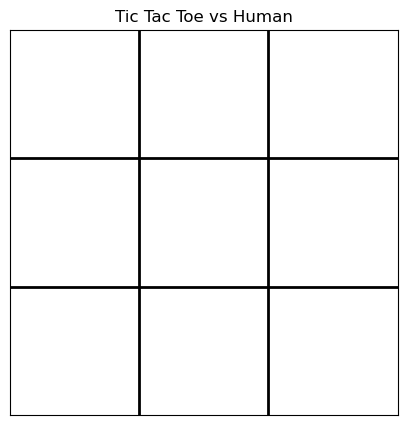

[['' '' '']
 ['' '' '']
 ['' '' 'X']]


<Figure size 640x480 with 0 Axes>

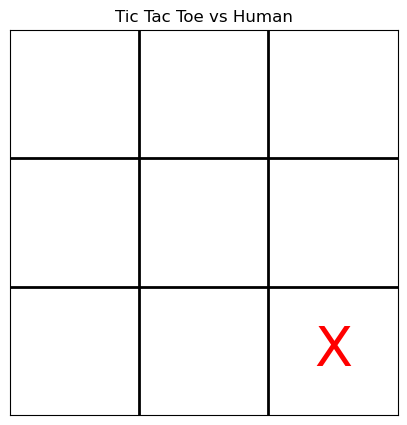

[['' '' '']
 ['' '' 'O']
 ['' '' 'X']]


<Figure size 640x480 with 0 Axes>

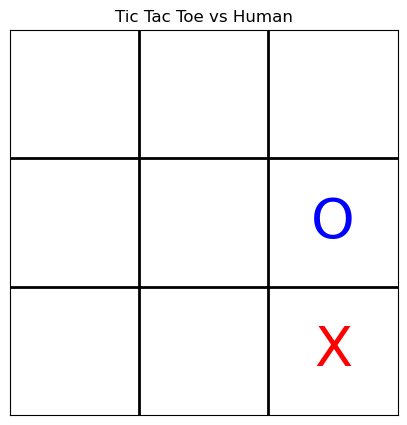

[['' '' 'X']
 ['' '' 'O']
 ['' '' 'X']]


<Figure size 640x480 with 0 Axes>

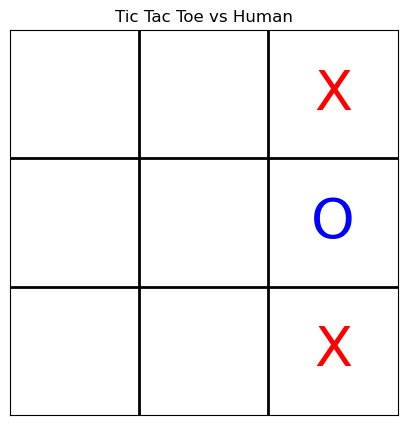

[['' '' 'X']
 ['' 'O' 'O']
 ['' '' 'X']]


<Figure size 640x480 with 0 Axes>

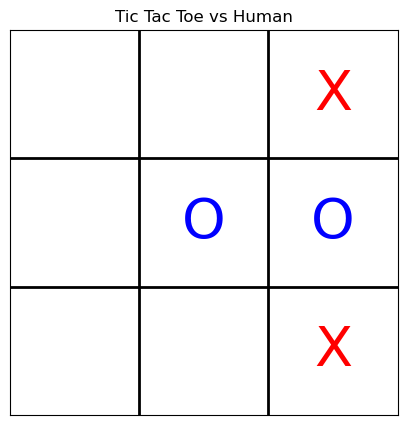

[['' 'X' 'X']
 ['' 'O' 'O']
 ['' '' 'X']]


<Figure size 640x480 with 0 Axes>

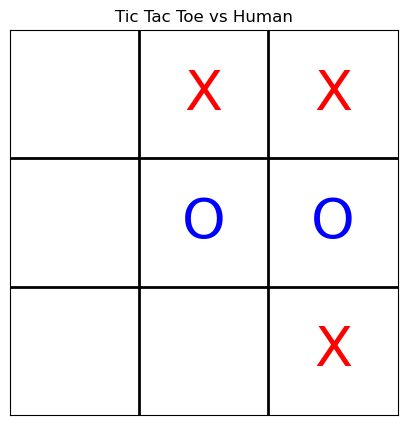

[['' 'X' 'X']
 ['O' 'O' 'O']
 ['' '' 'X']]
O player win


<Figure size 640x480 with 0 Axes>

In [ ]:
def input_processor(move):
    move = move.split(' ')
    
    x = int(move[0])
    y = int(move[1])
    return (x,y)


opponent = "Human"
choice = input("1 = Human. 2 = Random. 3 = Perfect Policy. 4 = Home Grown Policy 5 = Dont play")
run_game = True
if choice == "5":
    run_game = False
while run_game:
    
    #First Player
    if choice == "1":
        draw_board(board, "Human")
        make_move(board, input_processor(input("X players turn (input like this:1 2)")))
        draw_board(board, "Human")
        if check_win(board):
            run_game = False
            print("X player win")
            clear_board()
            continue
        if check_draw(board):
            run_game = False
            print("Draw")
            clear_board()
            continue
        player = "O"


    #Second Player
    make_move(board, input_processor(input("X players turn (input like this:1 2)")))
    draw_board(board)
    if check_win(board):
        run_game = False
        print("O player win")
        clear_board()
    if check_draw(board):
        run_game = False
        print("Draw")
        clear_board()
    player = "X"
        

